In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

# The function to be approximated

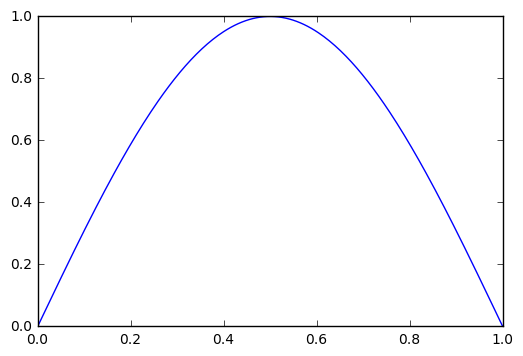

In [2]:
X = np.linspace(0, 1, 256, endpoint=True)
S =np.sin(np.pi*X)
plt.plot(X, S, color="blue", linewidth=1.0, linestyle="-")

In [3]:
order=100
alpha= 0.01
fbasis=[(lambda s,i=i: np.cos(i*np.pi*s)) for i in np.arange(0,order+1)]
theta=np.zeros(order+1)


# The Stochastic Gradient descent:
$$ \boldsymbol{\theta_{t+1}} = \boldsymbol{\theta_{t}}+\alpha[{v}_{\pi}(S_{t})-\hat{v}_{\pi}(S_{t}, \boldsymbol{\theta_{t}})]\nabla\hat{v}_{\pi}(S_{t}, \boldsymbol{\theta_{t}}) $$
The code below uses the fact, that in the case of the linear approximation $$\hat{v}(s, \boldsymbol{\theta})= \sum_{i}^{n}\theta_{i}\phi_{i}(s),$$where $$\phi_{i}(s)= cos(\pi c^{i}\cdot s)$$ the gradient  is: $\nabla\hat{v}(S_{t}, \boldsymbol{\theta_{t}})= \phi(s)$.

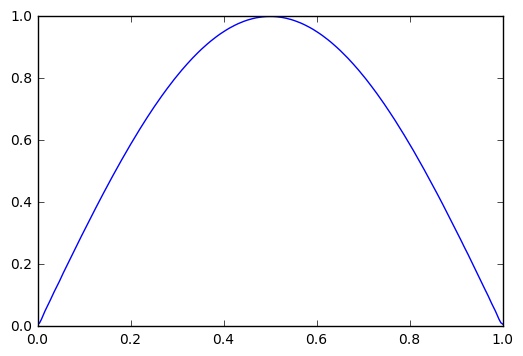

In [4]:
ndata=30000
for i in np.arange(1,ndata):
    s=random.uniform (0,1)
    feature = np.asarray([func(s) for func in fbasis])
    estimate=np.dot(feature, theta)
    theta += alpha*(np.sin(np.pi*s)-estimate)*feature
X = np.linspace(0, 1, 256, endpoint=True)
value=[]
for s in X:
    feature = np.asarray([func(s) for func in fbasis])
    estimate=np.dot(feature, theta)
    value.append(estimate)
plt.plot(X, value, color="blue", linewidth=1.0, linestyle="-")

# The same with OOP:

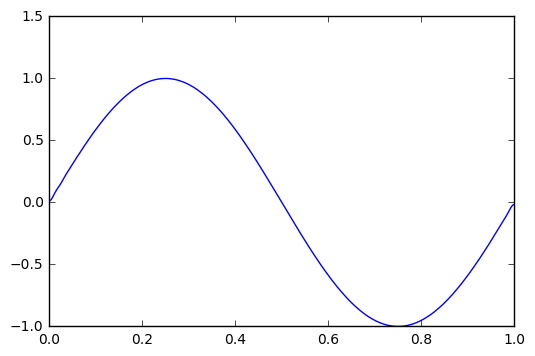

In [5]:
order=100
alpha= 0.01
X = np.linspace(0, 1, 256, endpoint=True)
nIterations=3000
function=lambda s: np.sin(2*np.pi*s)

class BasesFunction:
    def __init__(self, order):
        self.order = order
        self.weights = np.zeros(order + 1)
        self.bases = [(lambda s,i=i: np.cos(i*np.pi*s)) for i in np.arange(0,order+1)]
    def value(self, state):
        # map the state space into [0, 1]
        state /= float(N_STATES)
        # get the feature vector
        feature = np.asarray([func(state) for func in self.bases])
        return np.dot(self.weights, feature)

    def update(self, delta, state):
        # get derivative value
        derivativeValue = np.asarray([func(state) for func in self.bases])
        self.weights += delta * derivativeValue
        
def stochasticGradient(approximateFunction, function, alpha, iterations):
    for i in np.arange(1, iterations):
        state = random.uniform (0,1)
        
        feature = np.asarray([func(state) for func in approximateFunction.bases])
        estimate=np.dot(feature, approximateFunction.weights)
        delta = alpha*(function(state)-estimate)
        approximateFunction.update(delta, state)
def plotting(X, approximateFunction):
    value=[]
    for s in X:
        feature = np.asarray([func(s) for func in approximateFunction.bases])
        estimate=np.dot(feature, approximateFunction.weights)
        value.append(estimate)
    plt.plot(X, value, color="blue", linewidth=1.0, linestyle="-")

    
aproximateFunction=BasesFunction(order)
stochasticGradient(aproximateFunction, function, alpha, nIterations)
plotting(X,aproximateFunction)